# 【問題1】NLP復習
使用するファイルは以下の５つです。
2019-01-ai.json: 2019-01-aiのメッセージ履歴に関するデータ
random.json: randomのメッセージ履歴に関するデータ
global.json: globalのメッセージ履歴に関するデータ
users_dict.json: ユーザーID: ユーザーの名前
emoji.json: 絵文字の名前: 絵文字のURL

以下のように分析してください

- データを観察

globalはルワンダのクラウドファンディングの話が多い。2019-01-aiは遅刻が多い
- 全単語数をカウントする
- 全単語の種類をカウントする


In [13]:
# jsonを扱うライブラリ
import json

f = open('slack_data/2019-01-ai.json', 'r')
# jsonをdict型に変換
sample_dict_from_json = json.load(f)
# fiel開いたら閉じる
f.close()
# どのような構造になっているかを確認してください
print(sample_dict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


In [14]:
sample_dict_from_json

{'ok': True,
 'messages': [{'client_msg_id': '6f87c23f-cead-4eb0-b814-89adc7173025',
   'type': 'message',
   'text': '腹痛のため遅れます。',
   'user': 'UEG9UR1AM',
   'ts': '1554425975.002100',
   'reactions': [{'name': 'annoying_dog',
     'users': ['U9SL33S1M'],
     'count': 1}]},
  {'client_msg_id': 'B36D189F-05E1-42AD-9878-27C7A6097CEE',
   'type': 'message',
   'text': '<https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371>',
   'user': 'UEVMB7YDN',
   'ts': '1554423870.001200',
   'attachments': [{'title': 'Yoshiki Shimamoto',
     'title_link': 'https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371',
     'text': '【祝！Yahoo!ニュースに掲載されました！】 当社の世界初・液体画像認識AI「DeepLiquid」（ディープリキッド）がYahoo!ニュースに掲載されました！ -------- この水質管理を、カメラとディープラーニング（深層学習）でできないか──こんなことに着目したベンチャー企業AnyTech（東京都渋谷区）が、水質を判定できるAI（人工知能）を開発した。...',
     'fallback': 'Yoshiki Shimamoto',
     'image_url': 'https://external-iad3-1.xx.fbcdn.net/safe_image.php?d=AQDvvrDhOnG-g-dB&w=400&h=400&url=https%3A%2F%2Flpt.c.y

In [15]:
f = open('slack_data/2019-01-ai.json', 'r')
ai01dict_from_json = json.load(f)
f.close()
print(ai01dict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


In [47]:
f = open('slack_data/global.json', 'r')
globaldict_from_json = json.load(f)
f.close()
print(globaldict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


In [48]:
f = open('slack_data/random.json', 'r')
randdict_from_json = json.load(f)
f.close()
print(randdict_from_json.keys())

dict_keys(['ok', 'messages', 'has_more', 'is_limited'])


In [49]:
ai01text = []
globtest = []
randtext = []
for dic in ai01dict_from_json["messages"]:
    text = dic["text"]
    ai01text += [text]
for dic in globaldict_from_json["messages"]:
    text = dic["text"]
    globtest += [text]
for dic in randdict_from_json["messages"]:
    text = dic["text"]
    randtext += [text]

In [50]:
alltext = ai01text + globtest + randtext

In [52]:
len(alltext)

204

In [56]:
alltext

['腹痛のため遅れます。',
 '<https://www.facebook.com/yoshiki.shimamoto/posts/2235648403161371>',
 '1時間ほどおくれます！',
 'すいません、10分程遅れます',
 '<https://monoist.atmarkit.co.jp/mn/articles/1904/04/news044.html>',
 '<https://www.itmedia.co.jp/news/articles/1904/03/news087.html>',
 'だいごー！！:pikachu1:',
 'あったらで構いません！無かったら嫁の会社にあるかもなのでそれで行きます！',
 '木村さんが参加してくれるそうなので求めてます！',
 'dicにaiエクスポの招待券まだありますか？？',
 '論文をwebに変換してくれるやつ\n<https://www.arxiv-vanity.com/>',
 '窪田さんが今から行くの\n<https://5c8f3de71f271.splashthat.com/>',
 '<https://lib-arts.hatenablog.com/entry/paper11_GAN>',
 'ここ気をつけてください！下は修正済み\ntransform = transforms.Compose([\n        transforms.ToTensor(),\n        transforms.Normalize((0.5, ), (0.5, ))\n])',
 '<http://owatank.hatenablog.com/entry/2018/04/20/180151>',
 '<http://doll.hatenadiary.com/entry/2018/06/19/232243>',
 '復活したので行きます！15時に着きます。',
 '',
 '',
 '送ります。',
 '<!here>\n発表のPDFこちらにあげて下さあい:pikachu1:',
 '',
 'いえいえ、体が一番です！大変でしょうが、僕でよければいつでも相談乗ります！',
 '今日のやつ',
 'すいません、遅刻です',
 '今日お休みします。\n食事ミスってアレルギーで嘔吐が止まらないだけなので、

In [85]:
#クリーニング
# 正規表現操作のライブラリ
import re
c_text = []
for text in alltext:
    BAD_SYMBOL = re.compile(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#亜-熙ぁ-んァ-ヶ]+)")
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('[\n*`\s\＊]')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('<.{0,20}>')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile('【.{1,20}】')
    text = re.sub(BAD_SYMBOL, '', text)
    BAD_SYMBOL = re.compile(':.{1,20}:')
    text = re.sub(BAD_SYMBOL, '', text)
    c_text += [text]

In [86]:
c_text

['腹痛のため遅れます。',
 '',
 '1時間ほどおくれます！',
 'すいません、10分程遅れます',
 '',
 '',
 'だいごー！！',
 'あったらで構いません！無かったら嫁の会社にあるかもなのでそれで行きます！',
 '木村さんが参加してくれるそうなので求めてます！',
 'dicにaiエクスポの招待券まだありますか？？',
 '論文をwebに変換してくれるやつ',
 '窪田さんが今から行くの',
 '',
 'ここ気をつけてください！下は修正済みtransform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])',
 '',
 '',
 '復活したので行きます！15時に着きます。',
 '',
 '',
 '送ります。',
 '発表のPDFこちらにあげて下さあい',
 '',
 'いえいえ、体が一番です！大変でしょうが、僕でよければいつでも相談乗ります！',
 '今日のやつ',
 'すいません、遅刻です',
 '今日お休みします。食事ミスってアレルギーで嘔吐が止まらないだけなので、連休はしません！金曜は行きます。相談に乗って頂くお願いをしてたのに、すみません。',
 '4月期生の明日の自己紹介スライドです！よろしくお願いいたしまする。',
 '',
 '今日、たどり着けちゃいそうです。朝から現れますが驚かないでくださいmm',
 '了解いたしました。気をつけて来て下さい。',
 'すみません。電車の遅延により遅れます。まだ動く気配がないのでどのくらい遅れるかはわかりません。',
 '同じくおくれます',
 'すいません20分ほど遅れそうです',
 '',
 'remonを漫画化',
 '動画を漫画に変換するサービスDSNでのキーフレーム抽出とGANでのスタイル変換',
 '',
 '',
 '',
 '',
 '了解です！',
 'すいません、昼から行きます',
 '本日終会は17:00にしましょう！発表は江種さんです。',
 'すいません。着くの30分頃になりそうです',
 '4人揃ったらやりましょう！明日、明後日の説明もします。',
 'すいません。20分ほど遅れます',
 '',
 '3分遅れます',
 '遅れます、、',
 'い

In [280]:
from janome.tokenizer import Tokenizer
t = Tokenizer()
b_list = []
doc_list = []
for text in c_text:
    token = t.tokenize(text)
    do_list = []
    do_list += [word.surface for word in token if word.part_of_speech.split(',')[0] in ['名詞', '動詞']]
    doc_list += do_list
    b_list += [do_list]

In [281]:
from collections import Counter
cont = Counter(doc_list)

In [282]:
#全単語数のカウント
len(doc_list)

4294

In [283]:
#種類の降順
sorted(cont.items(), key=lambda x:x[1], reverse=True)

[('し', 121),
 ('/', 58),
 ('4', 42),
 ('い', 38),
 ('方', 35),
 ('DIVEINTOCODE', 34),
 ('さん', 33),
 ('する', 33),
 ('ルワンダ', 33),
 ('アフリカ', 32),
 ('者', 32),
 ('参加', 31),
 ('さ', 31),
 ('いる', 31),
 ('hasjoinedthechannel', 30),
 ('プロジェクト', 28),
 ('こと', 26),
 ('れ', 26),
 ('皆さん', 26),
 ('生', 24),
 ('の', 24),
 ('月', 22),
 ('エンジニア', 21),
 ('よう', 21),
 ('教育', 21),
 ('受講', 21),
 ('ください', 20),
 ('人', 20),
 ('IT', 20),
 ('お願い', 19),
 ('DEMODAY', 19),
 ('-', 18),
 ('支援', 18),
 ('ため', 17),
 ('いたし', 17),
 ('本日', 17),
 ('個人', 17),
 ('(', 17),
 ('コース', 17),
 ('ビジネス', 17),
 ('登壇', 17),
 ('1', 16),
 ('3', 16),
 ('6', 16),
 ('年', 16),
 ('円', 16),
 ('日', 15),
 (')', 15),
 ('おり', 15),
 ('CMO', 15),
 ('丸田', 15),
 ('DIC', 15),
 ('会', 14),
 ('私', 14),
 ('イベント', 14),
 ('th', 14),
 ('5', 13),
 ('なり', 12),
 ('希望', 12),
 ('あり', 11),
 ('.', 11),
 ('紹介', 11),
 ('必要', 11),
 ('ご覧', 11),
 ('万', 11),
 ('的', 11),
 ('名', 11),
 ('遅れ', 10),
 ('卒業', 10),
 ('き', 10),
 ('機会', 10),
 ('クラウドファンディング', 10),
 ('プログラミング', 10),
 (',', 10)

# 【問題2】WordCloud
ワードクラウドとは出現頻度などに応じて、
単語を空間上にプロットする手法です。

In [284]:
corpus = []
corpus_t = []
corpus_c = ""
for i in range(len(alltext)):
   a = t.tokenize(c_text[i], wakati=True)
   #corpus += [a]
   #corpus_t += a
   for j in a:
       corpus_c = corpus_c + " " + j

In [290]:
from wordcloud import WordCloud
stop = ["ます", "です", "さん", "から", "まし", "する", "こと", "いる", "ない", "まで", "たい"]
wordcloud = WordCloud(background_color="white",width=800,
                                        font_path="/Library/Fonts/Arial Unicode.ttf",
                                        stopwords= stop,
                                        height=600).generate(corpus_c)

wordcloud.to_file("./wordcloud_sample.png")

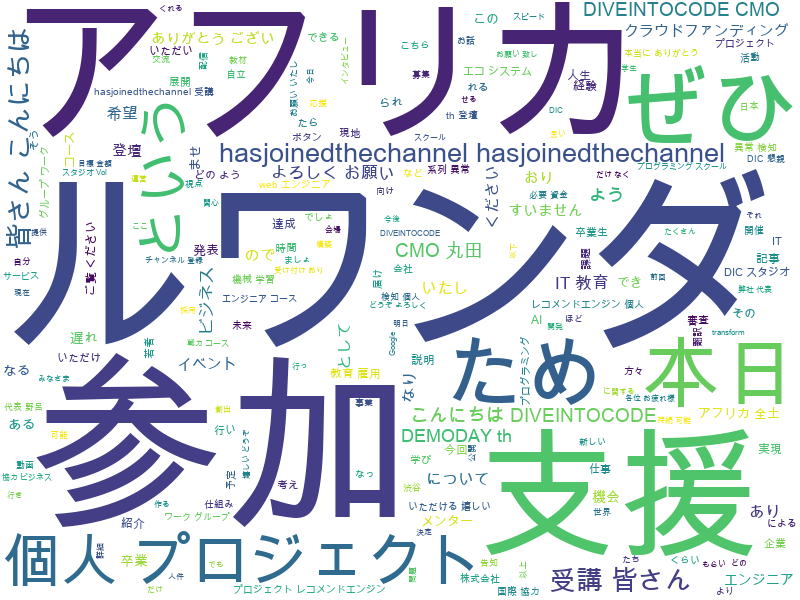

In [291]:
from IPython.display import Image, display_png
display_png(Image("wordcloud_sample.png"))
#ルワンダ関係が多いですね！

# 【問題3】あの人はどんな人？

In [160]:
f = open('slack_data/users_dict.json', 'r')
userdict_from_json = json.load(f)
f.close()
print(userdict_from_json.keys())

dict_keys(['U0CGPM9T2', 'U5WEHDZRC', 'U71KZN0HL', 'U7MLFT82K', 'U9SL33S1M', 'UCFCLSRCK', 'UEG9UR1AM', 'UEHD8A6H3', 'UEJ7TBV0R', 'UEJA5HS3G', 'UEVMB7YDN', 'UF1A4QA10', 'UF1KE2X8B', 'UG0P51PNC'])


In [166]:
userdict_from_json

{'U0CGPM9T2': 'Hiroyoshi Noro',
 'U5WEHDZRC': 'mentor_tatsuya_suzuki',
 'U71KZN0HL': 'mentor_tetsuro_nishio',
 'U7MLFT82K': 'mentor Shun Nakamura',
 'U9SL33S1M': 'yoshiko_endo',
 'UCFCLSRCK': 'mano_hironobu',
 'UEG9UR1AM': 'noritsugu_yamada',
 'UEHD8A6H3': 'yasunori_kimura',
 'UEJ7TBV0R': 'Kazuki_Egusa',
 'UEJA5HS3G': 'moriyasu_komiya',
 'UEVMB7YDN': 'Yohei Kawakami',
 'UF1A4QA10': 'naoki_sasaki',
 'UF1KE2X8B': 'Ayako Nonaka',
 'UG0P51PNC': 'kiyoshige.goto'}

In [225]:
def cojin_text(user):
    cojintext = []
    for dic in ai01dict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    for dic in globaldict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    for dic in randdict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] == user:
            cojintext += [text]
    return cojintext

def clearn_text(alltext):
    c_text = []
    for text in alltext:
        BAD_SYMBOL = re.compile(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#亜-熙ぁ-んァ-ヶ]+)")
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('[\n*`\s\＊]')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('<.{0,20}>')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('【.{1,20}】')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile(':.{1,20}:')
        text = re.sub(BAD_SYMBOL, '', text)
        c_text += [text]
    return c_text

def nukidasi(c_text):
    t = Tokenizer()
    b_list = []
    doc_list = []
    for text in c_text:
        token = t.tokenize(text)
        do_list = []
        do_list += [word.surface for word in token if word.part_of_speech.split(',')[0] in ['名詞', '動詞','形容詞']]
        doc_list += do_list
        b_list += [do_list]
    cont = Counter(doc_list)
    print(sorted(cont.items(), key=lambda x:x[1], reverse=True))

def matome(user):
    a = cojin_text(user)
    a = clearn_text(a)
    print("ユーザーネーム: {} さんの発言単語降順".format(userdict_from_json[user]))
    nukidasi(a)

In [228]:
matome('UF1A4QA10')

ユーザーネーム: naoki_sasaki さんの発言単語降順
[('送り', 1), ('電車', 1), ('遅延', 1), ('遅れ', 1), ('動く', 1), ('気配', 1), ('ない', 1), ('遅れる', 1), ('わかり', 1)]


In [230]:
matome("U0CGPM9T2")

ユーザーネーム: Hiroyoshi Noro さんの発言単語降順
[('し', 50), ('ルワンダ', 27), ('アフリカ', 23), ('IT', 20), ('教育', 17), ('する', 16), ('支援', 15), ('い', 15), ('円', 13), ('人', 13), ('こと', 12), ('年', 11), ('ビジネス', 11), ('さ', 10), (',', 10), ('全土', 9), ('プロジェクト', 9), ('いる', 9), ('雇用', 8), ('希望', 8), ('私', 8), ('万', 8), ('月', 8), ('卒業', 8), ('000', 8), ('可能', 7), ('機会', 7), ('エコ', 7), ('システム', 7), ('ため', 7), ('方', 7), ('おり', 7), ('現地', 7), ('いただけ', 6), ('持続', 6), ('若者', 6), ('自立', 6), ('ください', 6), ('よう', 6), ('学び', 6), ('実現', 6), ('必要', 6), ('資金', 6), ('活動', 6), ('の', 6), ('仕事', 6), ('国', 6), ('的', 6), ('(', 6), ('2019', 6), ('費', 6), ('達成', 5), ('DIVEINTOCODE', 5), ('き', 5), ('お願い', 5), ('日', 5), ('仕組み', 5), ('れ', 5), ('プログラミング', 5), ('スクール', 5), ('6', 5), ('せる', 4), ('未来', 4), ('目標', 4), ('金額', 4), ('みなさま', 4), ('300', 4), ('いたし', 4), ('クラウドファンディング', 4), ('事業', 4), ('展開', 4), ('発表', 4), ('協力', 4), ('1', 4), ('コース', 4), ('提供', 4), ('世界', 4), ('なり', 4), ('なる', 4), ('4', 4), ('エンジニア', 4), ('課題', 4), ('卒業生', 4), ('企

# 【問題4】誰が一番かまってもらってる？

In [267]:
readict = {}
for dic in ai01dict_from_json["messages"]:
    user = userdict_from_json[dic["user"]]
    try:
        for reaction in dic["reactions"]:
            if user in reaction.keys():
                readict[user] = readict[user] + reaction["count"]
            else:
                readict[user] =  reaction["count"]
    except KeyError:
        continue

In [270]:
#リアクションもらってる辞書！
readict

{'noritsugu_yamada': 2,
 'Yohei Kawakami': 1,
 'Kazuki_Egusa': 2,
 'Ayako Nonaka': 1,
 'moriyasu_komiya': 2,
 'naoki_sasaki': 1,
 'mentor Shun Nakamura': 1,
 'kiyoshige.goto': 1}

# 【問題5】Mr.Noro or Not Mr.Noro

In [294]:
norotext = cojin_text("U0CGPM9T2")
norotext = clearn_text(norotext)

In [309]:
def not_noro(user):
    cojintext = []
    for dic in ai01dict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] is not user:
            cojintext += [text]
    for dic in globaldict_from_json["messages"]:
        text = dic["text"]
        if dic["user"] is not user:
            cojintext += [text]
    for dic in randdict_from_json["messages"]:
        text = dic["text"]
        if dic["user"]  is not user:
            cojintext += [text]
    return cojintext

In [320]:
def wakati(c_text):
    corpus = []
    for i in range(len(c_text)):
       a = t.tokenize(c_text[i], wakati=True)
       corpus += [a]
    return corpus

In [321]:
norotext = cojin_text("U0CGPM9T2")
norotext = clearn_text(norotext)
norotext = wakati(norotext)
not_norotext = not_noro("U0CGPM9T2")
not_norotext = clearn_text(not_norotext)
not_norotext = wakati(not_norotext)
context = norotext + not_norotext

In [326]:
import numpy as np
ytrain = np.hstack((np.ones(len(norotext)), np.zeros(len(not_norotext))))

In [344]:
#数値変換辞書作成
norodict = {}
count = 1
for text in context:
    for tango in text:
        if  tango in norodict.keys():
            pass
        else:
            norodict[tango] = count
            count += 1

In [357]:
maxlen = 0
for text in context:
    if len(text) > maxlen:
        maxlen = len(text)

In [384]:
#数値変換とゼロうめ
context_ar = np.empty((0, maxlen))
for text in context:
    leng = len(text)
    texts = np.zeros(maxlen)#zeroうめ
    for i, tango in enumerate(text):
        texts[i + maxlen - leng] = norodict[tango] #数値変換
    context_ar = np.vstack((context_ar, texts))

In [385]:
#中身ないアレーは消す
delind = np.where(np.max(context_ar, axis=1) == 0)[0]
context_ar = np.delete(context_ar, delind, axis=0)
ytrain = np.delete(ytrain, delind)

In [402]:
import keras
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, GRU
from keras.models import Model

In [422]:
input_dim = max(norodict.values()) +1

In [480]:
#モデル構築
imp = Input(shape=(None,))
z = Embedding(input_dim, 150, mask_zero=True)(imp)
z = GRU(150)(z)
z = Dense(100)(z)
out = Dense(1, activation="sigmoid")(z)

model = Model(imp, out)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [481]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 150)         255750    
_________________________________________________________________
gru_7 (GRU)                  (None, 150)               135450    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 406,401
Trainable params: 406,401
Non-trainable params: 0
_________________________________________________________________


In [563]:
model.fit(context_ar, ytrain, batch_size=19 ,epochs=10)

Epoch 1/10
189/189 [==============================] - 21s 110ms/step - loss: 0.2770 - acc: 0.7831
Epoch 2/10
189/189 [==============================] - 23s 121ms/step - loss: 0.3614 - acc: 0.7672
Epoch 3/10
189/189 [==============================] - 31s 162ms/step - loss: 0.2764 - acc: 0.7937
Epoch 4/10
189/189 [==============================] - 30s 158ms/step - loss: 0.2749 - acc: 0.7831
Epoch 5/10
189/189 [==============================] - 24s 129ms/step - loss: 0.2764 - acc: 0.7672
Epoch 6/10
189/189 [==============================] - 24s 129ms/step - loss: 0.2703 - acc: 0.7725
Epoch 7/10
189/189 [==============================] - 24s 128ms/step - loss: 0.2704 - acc: 0.7778
Epoch 8/10
189/189 [==============================] - 24s 126ms/step - loss: 0.2701 - acc: 0.7725
Epoch 9/10
189/189 [==============================] - 30s 158ms/step - loss: 0.2685 - acc: 0.7566
Epoch 10/10
189/189 [==============================] - 23s 120ms/step - loss: 0.2712 - acc: 0.8148


In [761]:
test = ["＊【再々掲：スペシャル特典】有償のRubyMineやPyCharmの ｀6ヶ月間100%OFFクーポン｀ がまだ30名様分残っています！＊欲しい方は、スタンプをお願いします！"]

In [762]:
test = clearn_text(test)
test = wakati(test)
texts = np.zeros(len(test[0]))#zeroうめ
for test1 in test:
    for i, tango in enumerate(test1):
        try:
            texts[i] = norodict[tango] #数値変換
        except KeyError:
            continue

In [763]:
test_ar = np.array(texts).reshape(1,-1)

In [764]:
model.predict(test_ar)

array([[0.22655515]], dtype=float32)

データは野呂さんじゃないと判定されてしまいました・・・